# Commodity Dashboard

## Importing Data, Libraries and Scripts

Data is stored into commodity_lab/db/commodities.db 

In [8]:
import sys
print(sys.executable)

c:\Users\dgalassi\commodity_lab\env_commodity_lab\Scripts\python.exe


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly as ply
import plotly.express as px
import seaborn as sns
import sys

In [153]:
#do not print warnings for cleaness of the notebook
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#update the database with the most recent data
sys.path.append('../../scripts')
from update_commodities_data import update_commodities

#tickers i want to update
tickers = {
    "Gold": "GC=F",
    "Silver": "SI=F",
    "Crude Oil": "CL=F",
    "Natural Gas": "NG=F",
    "Copper": "HG=F",
    "Corn": "ZC=F",
    "Wheat": "ZW=F"
}
update_commodities(tickers)

[*********************100%***********************]  1 of 1 completed

Fetching  data for Gold (GC=F) - Period: 1y, Interval: 1d
Fetching  data for Silver (SI=F) - Period: 1y, Interval: 1d



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching  data for Crude Oil (CL=F) - Period: 1y, Interval: 1d
Fetching  data for Natural Gas (NG=F) - Period: 1y, Interval: 1d


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching  data for Copper (HG=F) - Period: 1y, Interval: 1d
Fetching  data for Corn (ZC=F) - Period: 1y, Interval: 1d


[*********************100%***********************]  1 of 1 completed

Fetched 1517 rows of data
Uploaded 1517 rows to prices table in database at ../../db/commodities.db
Data uploaded successfully


In [155]:
#connect to commodities db 
import sqlite3 as sql

#enstablish a connection
conn = sql.connect("../../db/commodities.db")
df = pd.read_sql('SELECT * FROM prices',conn)
conn.close()

## Analyze the Dataset

1. Price Trends & Returns

Line charts of price history for key commodities

% change over multiple time horizons (1 day, 5 days, 1 month, 1 year)

Quick summary stats (last price, daily return, volatility)

2. Volatility & Risk Metrics

Rolling volatility (e.g., 30-day std dev)

Maybe Value at Risk (VaR) or drawdowns for the bigger picture risk view

3. Correlations

Heatmap or matrix showing correlation between commodities over the past month or quarter — helps PMs see diversification or contagion

4. Volume & Liquidity

Volume trends, so they know where the market interest is

5. Alerts or Significant Moves

Highlight big moves or breakouts (e.g., +3% daily move)

Could be a simple “flag” or conditional formatting

6. Comparative Analysis

Commodities side-by-side to see which are outperforming

### Price Trends and Returns

In [185]:
df['date'] = pd.to_datetime(df['date'])
#exclude wheat
df = df[df.name != 'Wheat']
df_prices = df[['date','name','close']]
df_prices['date'] = pd.to_datetime(df.date)

In [186]:
#pivot to wide so we have each commodity in a column
df_wide = df.pivot(index='date', columns='name', values='close')
#calculate returns, reconvert to wide and drop NaN
df_daily = df_wide.pct_change(1).reset_index().melt(id_vars='date', var_name='name', value_name='return').dropna()
df_weekly = df_wide.pct_change(5).reset_index().melt(id_vars='date', var_name='name', value_name='return').dropna()
df_monthly = df_wide.pct_change(21).reset_index().melt(id_vars='date', var_name='name', value_name='return').dropna()

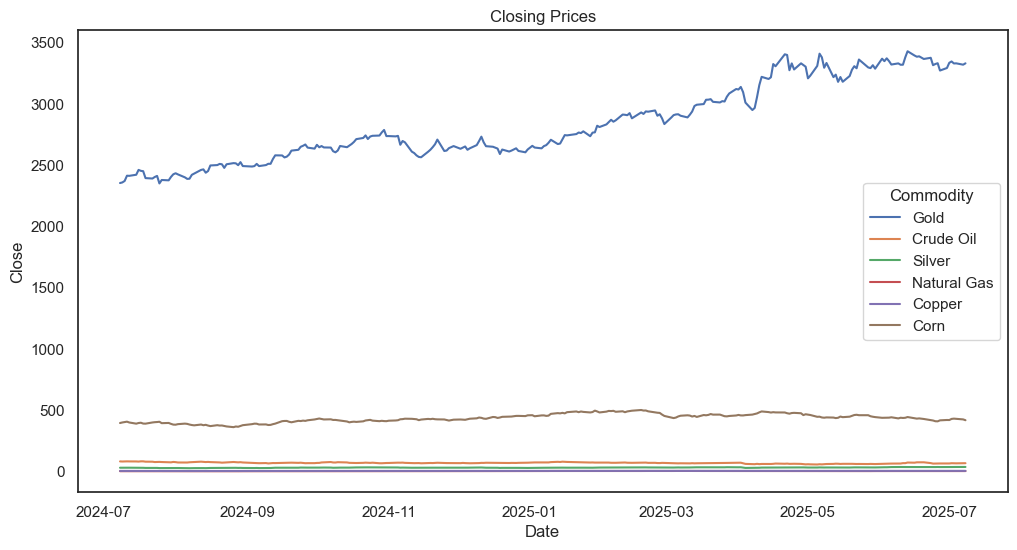

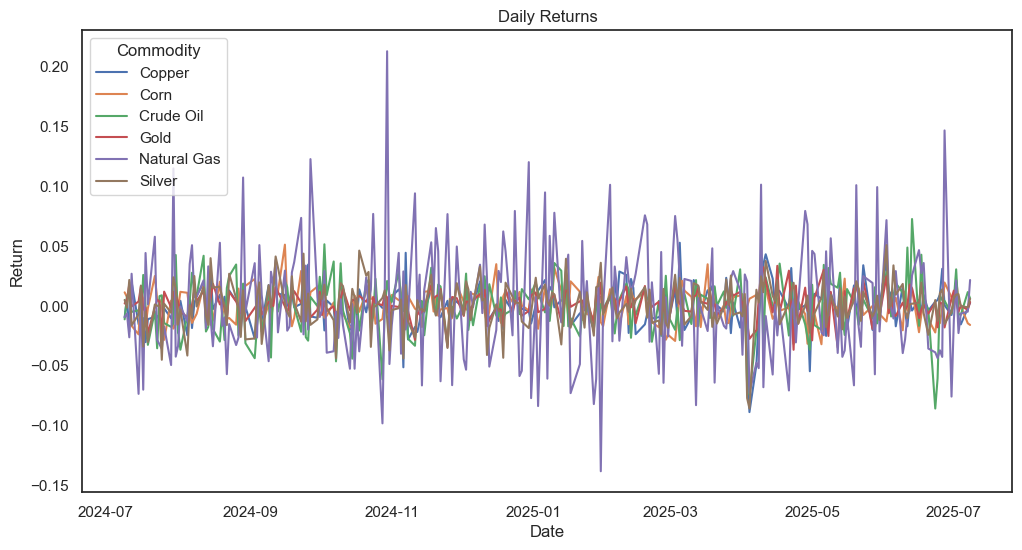

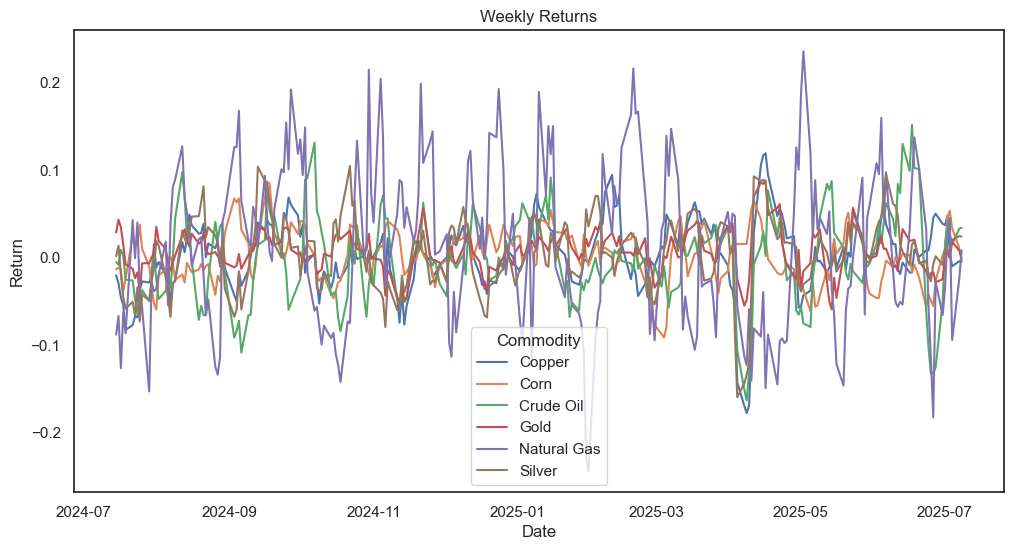

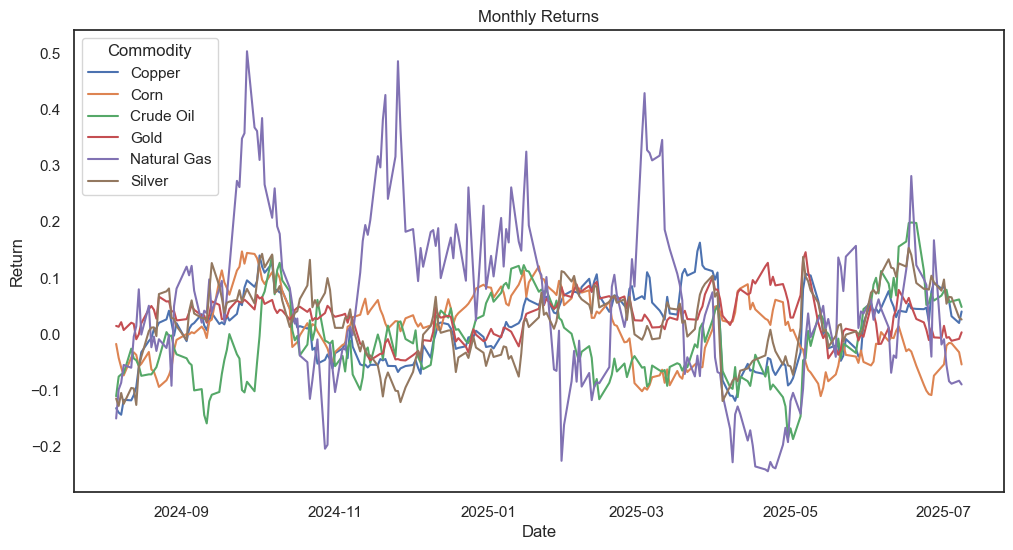

In [187]:
sns.set(style="white") 
# line plot: Closing Prices
plt.figure(figsize=(12,6))
sns.lineplot(data=df_prices, x='date', y='close', hue='name')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(title='Commodity')
plt.show()

# line plot: Daily Returns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='date', y='return', hue='name')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(title='Commodity')
plt.show()

# line plot: Weekly Returns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_weekly, x='date', y='return', hue='name')
plt.title('Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(title='Commodity')
plt.show()

# line plot: Monthly Returns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x='date', y='return', hue='name')
plt.title('Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(title='Commodity')
plt.show()


Remove the comment to visualie dynamically with plotly 

In [188]:
'''
# line plots

fig_close_prices = px.line(df_prices, x='date', y='close', color='name',title='Closing Prices')
fig_close_prices.show()

fig_daily_return = px.line(df_daily, x='date', y='return', color='name',title='Daily Returns')
fig_daily_return.show()

fig_weekly_return = px.line(df_weekly, x='date', y='return', color='name',title='Weekly Returns')
fig_weekly_return.show()

fig_monthly_return = px.line(df_monthly, x='date', y='return', color='name',title='Monthly Returns')
fig_monthly_return.show()

'''

"\n# line plots\n\nfig_close_prices = px.line(df_prices, x='date', y='close', color='name',title='Closing Prices')\nfig_close_prices.show()\n\nfig_daily_return = px.line(df_daily, x='date', y='return', color='name',title='Daily Returns')\nfig_daily_return.show()\n\nfig_weekly_return = px.line(df_weekly, x='date', y='return', color='name',title='Weekly Returns')\nfig_weekly_return.show()\n\nfig_monthly_return = px.line(df_monthly, x='date', y='return', color='name',title='Monthly Returns')\nfig_monthly_return.show()\n\n"

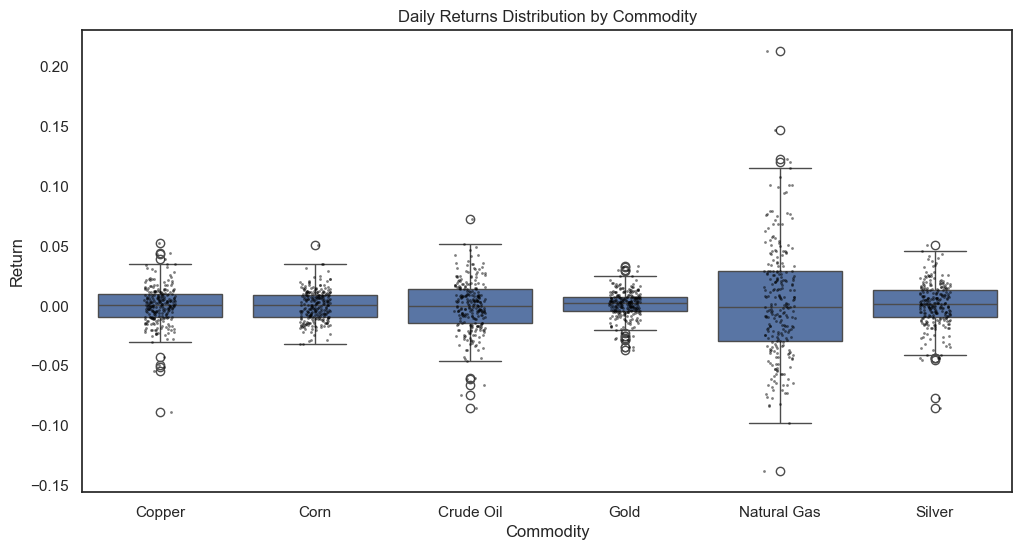

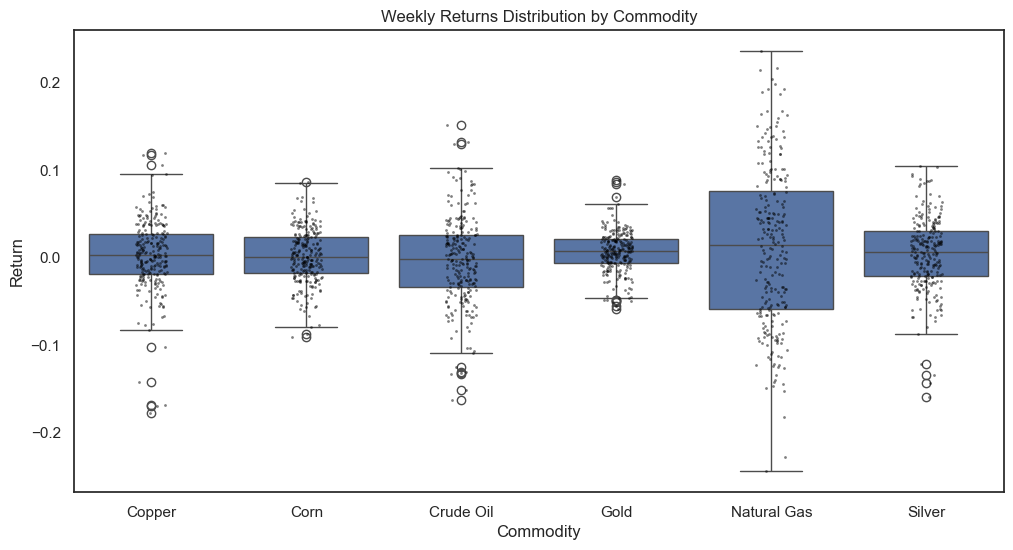

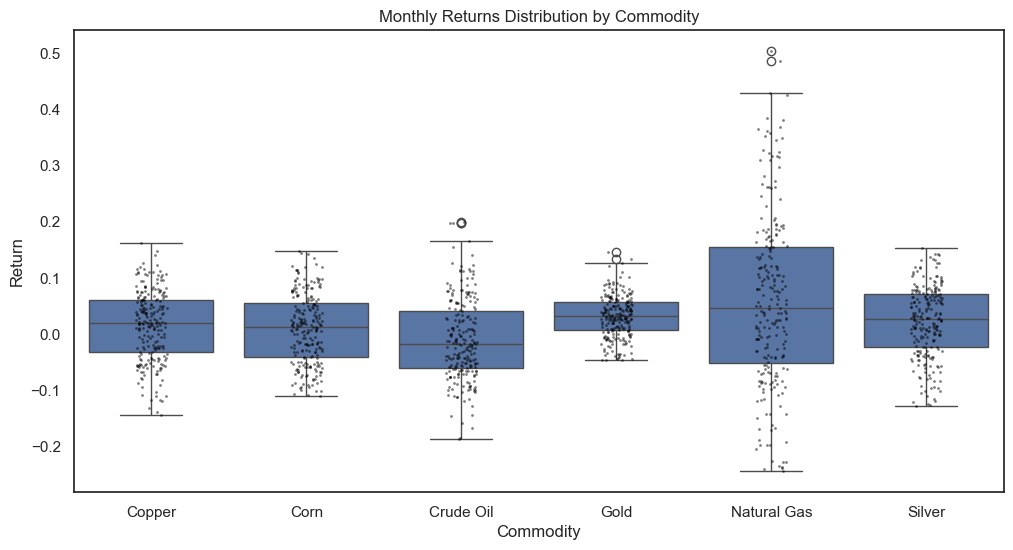

In [189]:
sns.set(style="white")  # clean white background

# Daily Returns Distribution by Commodity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_daily, x='name', y='return')
sns.stripplot(data=df_daily, x='name', y='return', color='black', size=2, jitter=True, alpha=0.5)
plt.title('Daily Returns Distribution by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Return')
plt.grid(False)
plt.show()

# Weekly Returns Distribution by Commodity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_weekly, x='name', y='return')
sns.stripplot(data=df_weekly, x='name', y='return', color='black', size=2, jitter=True, alpha=0.5)
plt.title('Weekly Returns Distribution by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Return')
plt.grid(False)
plt.show()

# Monthly Returns Distribution by Commodity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_monthly, x='name', y='return')
sns.stripplot(data=df_monthly, x='name', y='return', color='black', size=2, jitter=True, alpha=0.5)
plt.title('Monthly Returns Distribution by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Return')
plt.grid(False)
plt.show()


Remove the comment to visualie dynamically with plotly 

In [190]:
'''
#box plots

fig_daily_box_return = px.box(df_daily,x='name',y='return',points='all',
                              title='Daily Returns Distribution by Commodity')
fig_daily_box_return.show()


fig_weekly_box_return = px.box(df_weekly,x='name',y='return',points='all',
                              title='Weekly Returns Distribution by Commodity')
fig_weekly_box_return.show()


fig_monthly_box_return = px.box(df_monthly,x='name',y='return',points='all',
                              title='Monthly Returns Distribution by Commodity')
fig_monthly_box_return.show()
'''

"\n#box plots\n\nfig_daily_box_return = px.box(df_daily,x='name',y='return',points='all',\n                              title='Daily Returns Distribution by Commodity')\nfig_daily_box_return.show()\n\n\nfig_weekly_box_return = px.box(df_weekly,x='name',y='return',points='all',\n                              title='Weekly Returns Distribution by Commodity')\nfig_weekly_box_return.show()\n\n\nfig_monthly_box_return = px.box(df_monthly,x='name',y='return',points='all',\n                              title='Monthly Returns Distribution by Commodity')\nfig_monthly_box_return.show()\n"

### Volatility & Drawdowns

In [191]:
#annualized rolling volatility 
df_daily_wide = df_daily.pivot(index='date',columns='name',values='return')
df_rolling_vol = df_daily_wide.rolling(window=21).std()*np.sqrt(252)
df_rolling_vol = df_rolling_vol.reset_index().melt(id_vars='date', var_name='name', value_name='volatility')
df_rolling_vol= df_rolling_vol.dropna()

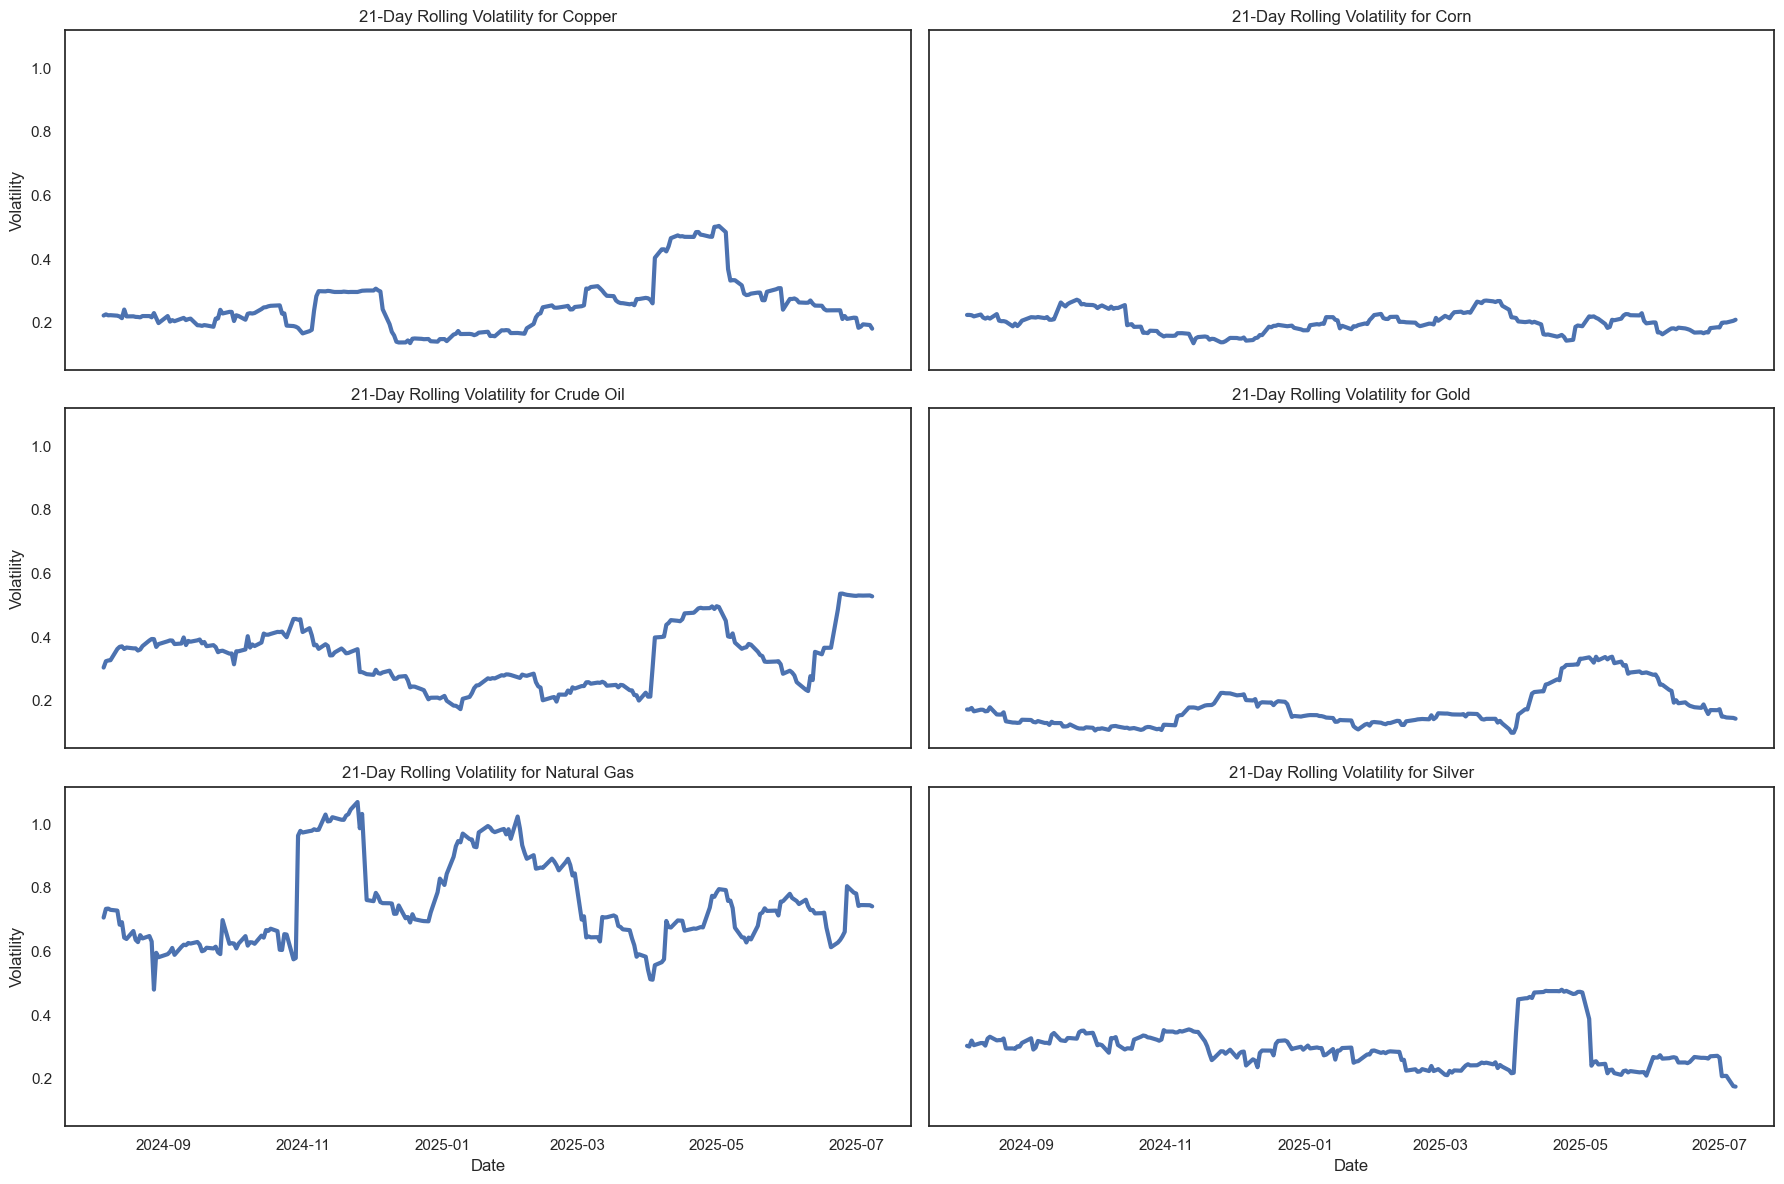

In [213]:
commodities = df_rolling_vol.name.unique()
num_plots = len(commodities)

fig, axes = plt.subplots(3, 2, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()  # flatten to easily index with a single number

for i, commodity in enumerate(commodities):
    ax = axes[i]
    y = df_rolling_vol[df_rolling_vol.name == commodity]
    
    sns.lineplot(data=y, x='date', y='volatility', ax=ax, linewidth = 3)
    ax.set_title(f'21-Day Rolling Volatility for {commodity}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility')


plt.tight_layout()
plt.show()


In [193]:
#max drawdown
df_dd = df_prices.pivot(index='date', values='close', columns='name')
running_max = df_dd.cummax()
df_dd = (df_dd - running_max)/running_max
df_dd = df_dd.reset_index().melt(value_name='drawdown', var_name='name', id_vars='date')

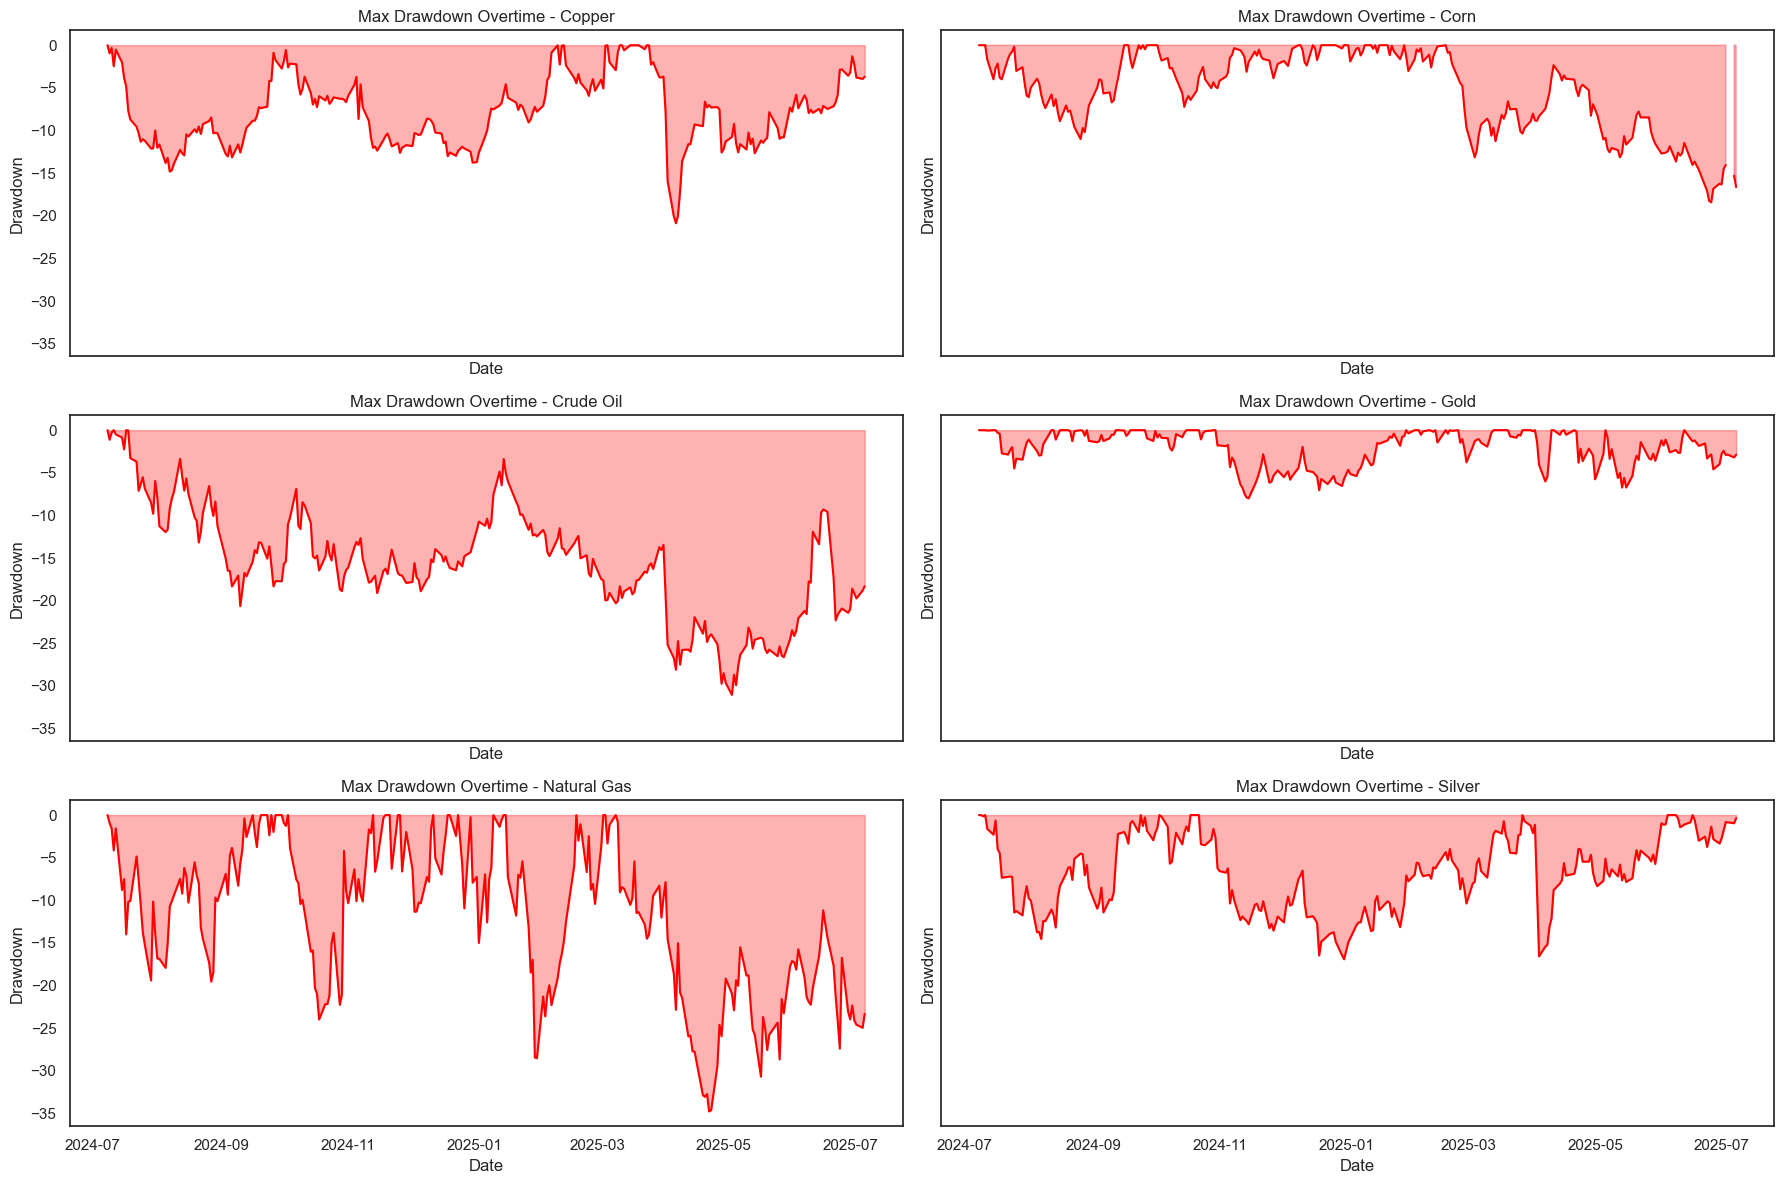

In [214]:
commodities = df_dd.name.unique()

fig, axes = plt.subplots(3, 2, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()  # flatten to easily index with a single number

for i, commodity in enumerate(commodities):
    ax = axes[i]
    y = df_dd[df_dd.name == commodity]
    
    ax.plot(y.date, y.drawdown*100, color = 'red')
    ax.fill_between(y.date,0,y.drawdown*100, color = 'red',alpha = 0.3)
    ax.set_title(f'Max Drawdown Overtime - {commodity}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Drawdown')


plt.tight_layout()
plt.show()


In [197]:
#VaR - on any given perios there is only a 5% risk of losing more than X% 
#CVar - the average loss of those 5% worst cases

#daily
df_daily_var95 = df_daily.pivot(index='date', values='return', columns='name')
var95 = df_daily_var95.quantile(0.05)
c_var95 = df_daily_var95[df_daily_var95 <= var95].mean()
varCvar_dict = {'daily_var95':var95,'daily_cvar95':c_var95}
df_daily_varCvar = pd.DataFrame(varCvar_dict)

#weekly
df_weekly_var95 = df_weekly.pivot(index='date', values='return', columns='name')
var95 = df_weekly_var95.quantile(0.05)
c_var95 = df_weekly_var95[df_weekly_var95 <= var95].mean()
varCvar_dict = {'weekly_var95':var95,'weekly_cvar95':c_var95}
df_weekly_varCvar = pd.DataFrame(varCvar_dict)

#monthly
df_monthly_var95 = df_monthly.pivot(index='date', values='return', columns='name')
var95 = df_monthly_var95.quantile(0.05)
c_var95 = df_monthly_var95[df_monthly_var95 <= var95].mean()
varCvar_dict = {'monthly_var95':var95,'monthly_cvar95':c_var95}
df_monthly_varCvar = pd.DataFrame(varCvar_dict)

df_varCvar = pd.concat([df_daily_varCvar,df_weekly_varCvar,df_monthly_varCvar],axis=1)
df_varCvar

,daily_var95,daily_cvar95,weekly_var95,weekly_cvar95,monthly_var95,monthly_cvar95
name,,,,,,
Copper,-0.022626,-0.037759,-0.055945,-0.101454,-0.089233,-0.115741
Corn,-0.018246,-0.024473,-0.048231,-0.065071,-0.089434,-0.098935
Crude Oil,-0.034193,-0.051534,-0.082227,-0.116482,-0.109418,-0.140977
Gold,-0.018081,-0.026743,-0.035546,-0.046553,-0.035105,-0.041884
Natural Gas,-0.067049,-0.081886,-0.123477,-0.156792,-0.194717,-0.223171
Silver,-0.031939,-0.045654,-0.060098,-0.091833,-0.095624,-0.112234


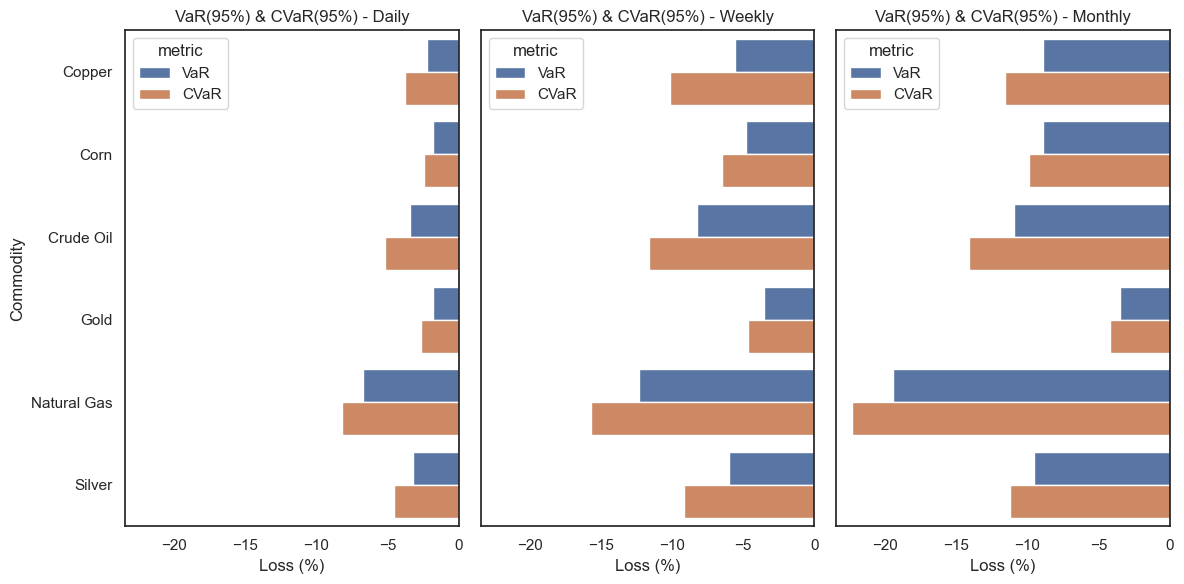

In [211]:
# reshape the df into y to plot

#reset index so name i a column
y = df_varCvar.reset_index()
#melt into a long format
y = y.melt(id_vars='name',
    value_vars=['daily_var95', 'daily_cvar95', 'weekly_var95', 'weekly_cvar95', 'monthly_var95', 'monthly_cvar95'],
    var_name='metric_name', value_name='value')
#create the metric column
y['period'] = y['metric_name'].str.extract(r'(daily|weekly|monthly)')
#create the 
y['metric'] = y['metric_name'].str.extract(r'(var95|cvar95)').replace({'var95':'VaR', 'cvar95':'CVaR'})
y.value = y.value*100
#plotting
fig, axes = plt.subplots(1,3,figsize=(12,6),sharex=True,sharey=True)
axes = axes.flatten()
for i, horizon in enumerate(['daily', 'weekly', 'monthly']):  # fixed order
    ax = axes[i]
    data = y[y['period'] == horizon]
    sns.barplot(data = data, x='value', y = 'name', hue ='metric', ax=ax)
    ax.set_title(f'VaR(95%) & CVaR(95%) - {horizon.capitalize()}')
    ax.set_xlabel('Loss (%)')
    ax.set_ylabel('Commodity' if i==0 else '')
    ax.axvline(0, color='black', linestyle='--', lw=1)
    ax.grid(False)

plt.tight_layout()
plt.show()

### 3